<a href="https://colab.research.google.com/github/shazm12/Predicting-Fine-Aggregate-of-Concrete-Using-Linear-Regression/blob/main/Linear_Regression_Concrete_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_excel('/content/drive/MyDrive/Concrete_Data.xls')
dataset.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [ ]:
dataset.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


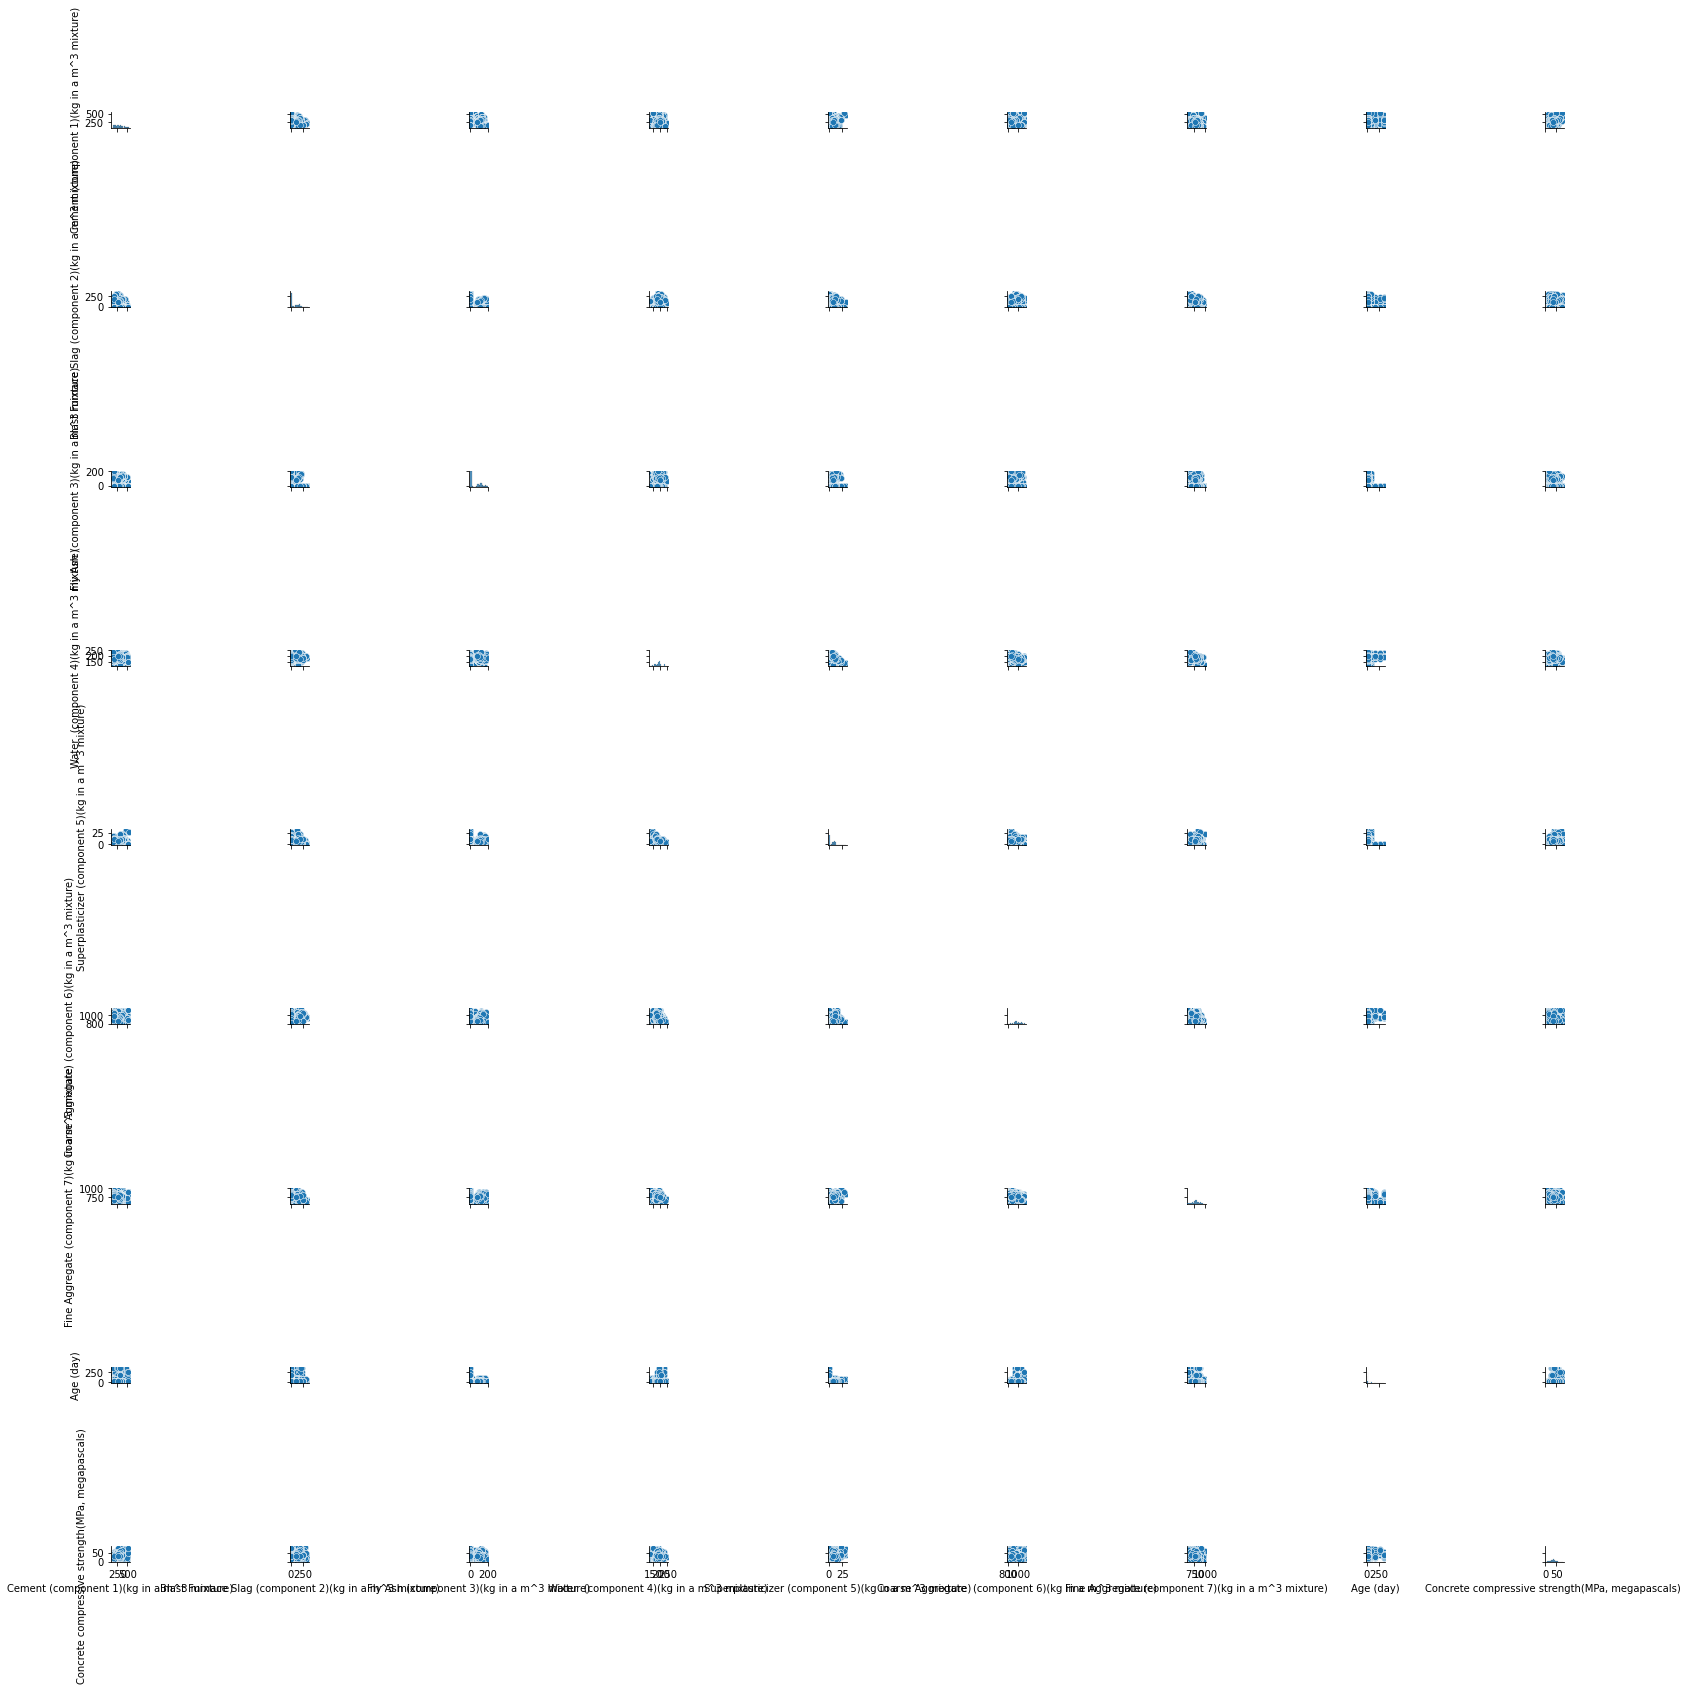

In [ ]:
sns.pairplot(dataset)

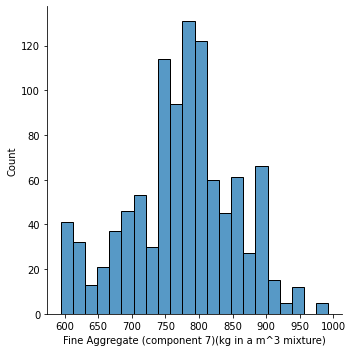

In [ ]:
sns.displot(dataset['Fine Aggregate (component 7)(kg in a m^3 mixture)'])

In [ ]:
x = dataset[list(dataset.columns)]
x.pop('Fine Aggregate (component 7)(kg in a m^3 mixture)')
y = dataset['Fine Aggregate (component 7)(kg in a m^3 mixture)']
print(x)
print(y)

      Cement (component 1)(kg in a m^3 mixture)  ...  Concrete compressive strength(MPa, megapascals) 
0                                         540.0  ...                                         79.986111
1                                         540.0  ...                                         61.887366
2                                         332.5  ...                                         40.269535
3                                         332.5  ...                                         41.052780
4                                         198.6  ...                                         44.296075
...                                         ...  ...                                               ...
1025                                      276.4  ...                                         44.284354
1026                                      322.2  ...                                         31.178794
1027                                      148.5  ...                     

In [ ]:
from sklearn.model_selection import train_test_split


X_train,X_test,Y_train,Y_test = train_test_split(x, y, test_size=0.6, random_state=101)



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
lm = LinearRegression()
lm.fit(X_train,Y_train)
print(lm.intercept_)

2272.448187307473


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
print(coeff_df)

                                                    Coefficient
Cement (component 1)(kg in a m^3 mixture)             -0.661566
Blast Furnace Slag (component 2)(kg in a m^3 mi...    -0.819474
Fly Ash (component 3)(kg in a m^3 mixture)            -0.853450
Water  (component 4)(kg in a m^3 mixture)             -2.849157
Superplasticizer (component 5)(kg in a m^3 mixt...    -1.532383
Coarse Aggregate  (component 6)(kg in a m^3 mix...    -0.700385
Age (day)                                             -0.042449
Concrete compressive strength(MPa, megapascals)        0.104487


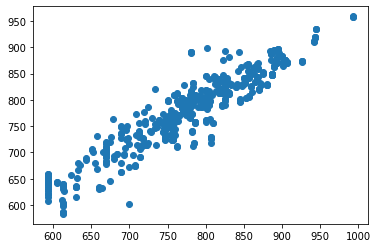

In [ ]:
predictions = lm.predict(X_test)
plt.scatter(Y_test,predictions)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


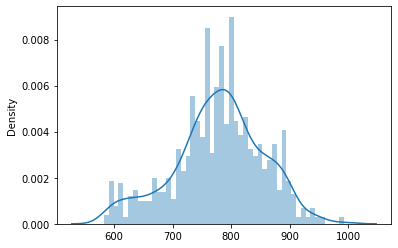

In [ ]:
sns.distplot((Y_test,predictions),bins=50)